In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('BigCitiesHealth.csv')

In [ ]:

data.tail()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148291,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN


In [ ]:
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                      float64
value                              float64
date_label                           int64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

### Data Visualisation

In [ ]:
data.nunique()

metric_item_label                    109
metric_cat_label                      11
metric_subcat_label                   33
metric_item_label_subtitle           109
metric_cat_item_yaxis_label           16
metric_source_desc_label_fn           12
metric_source_desc_label_url_fn       12
geo_label_city                        36
geo_label_state                       23
geo_label_citystate                   36
geo_fips_code                         35
value                              96698
date_label                            11
geo_label_proxy_or_real                2
geo_label_proxy_footnote               4
geo_fips_desc                          3
date_label_proxy_or_real               2
date_label_proxy_footnote              5
value_ci_flag_yesno                    2
value_95_ci_low                    85213
value_95_ci_high                   85458
value_90_ci_low                        0
value_90_ci_high                       0
geo_strata_region                      4
geo_strata_pover

Text(0, 0.5, 'Counts')

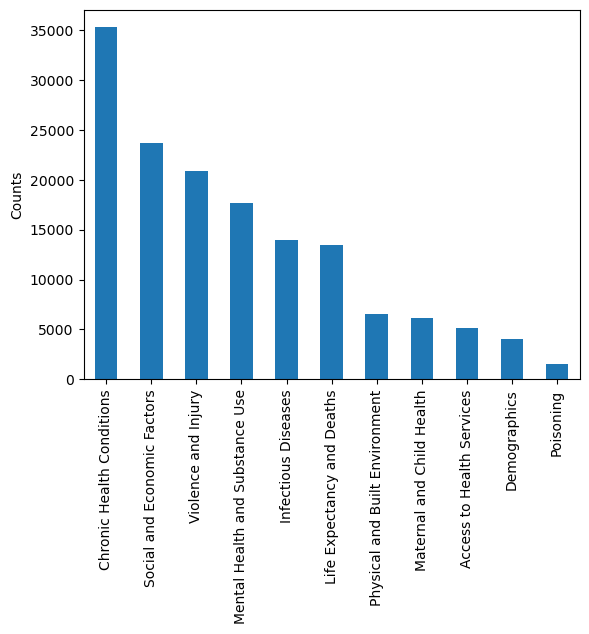

In [ ]:
cat_counts = data['metric_cat_label'].value_counts()
cat_counts.plot.bar()
plt.ylabel('Counts')

Text(0.5, 1.0, 'Amount of data for each metric')

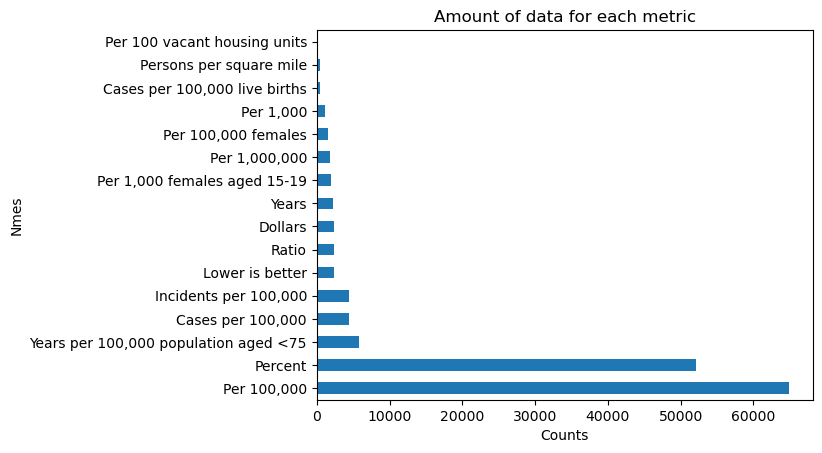

In [ ]:
cat2_counts = data['metric_cat_item_yaxis_label'].value_counts()
axis = cat2_counts.plot.barh()
axis.set_xlabel('Counts')
axis.set_ylabel('Nmes')
plt.title('Amount of data for each metric')



Text(0.5, 1.0, 'Amount of persons per year')

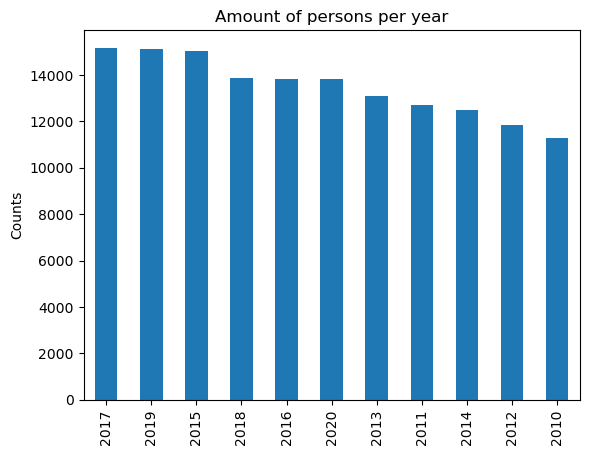

In [ ]:
data['date_label'] = data['date_label'].astype(int)
date_counts = data['date_label'].value_counts()
date_counts.plot.bar()
plt.ylabel('Counts')
plt.title('Amount of persons per year')

### Looking for Missing Values and Outliers
The numerical columns in our data are: 'value_95_ci_low' and 'value_95_ci_high'

In [ ]:

missing_values = data.isnull().sum()
missing_values



metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1097
geo_label_citystate                     0
geo_fips_code                        1097
value                                 770
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           133002
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          104164
value_ci_flag_yesno                     0
value_95_ci_low                     54914
value_95_ci_high                    54904
value_90_ci_low                    148292
value_90_ci_high                   148292
geo_strata_region                 

In [ ]:
len(data)

148292

We can see that the column with the most missing values is 'value_90_ci_low' and 'value_90_ci_high' where there is acutally no data at all. So we will delete these two columns. 

Therefore, delete the rows with missing values in these two columns.

In [ ]:
#Deleting rows with missing values in 'value_95_ci_low' and 'value_95_ci_high'.
data = data.drop(['value_90_ci_low', 'value_90_ci_high'], axis=1)
data.isnull().sum()


metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1097
geo_label_citystate                     0
geo_fips_code                        1097
value                                 770
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           133002
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          104164
value_ci_flag_yesno                     0
value_95_ci_low                     54914
value_95_ci_high                    54904
geo_strata_region                    1097
geo_strata_poverty                   1097
geo_strata_Population             

In [ ]:
len(data)

148292

To get an overview how much is still missing

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

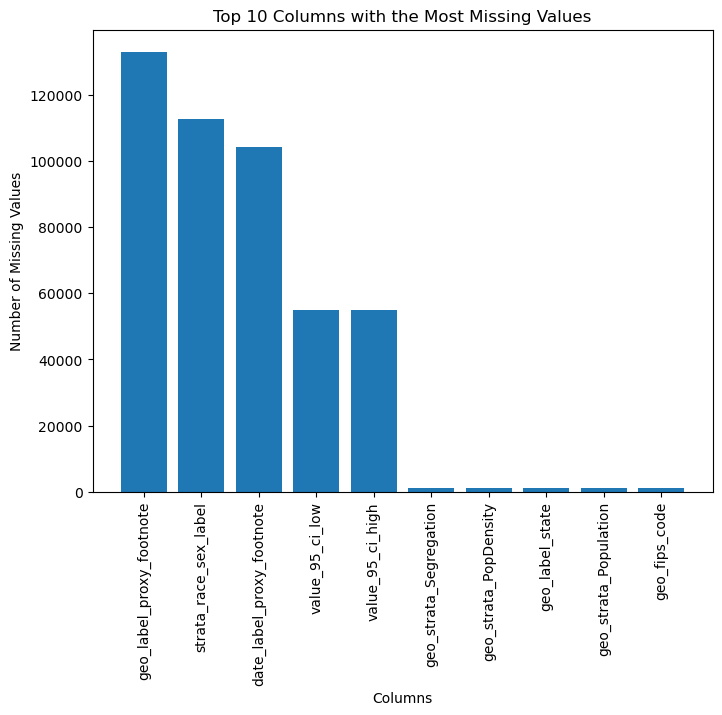

In [ ]:
missing_values_count = data.isnull().sum()

sorted_columns = missing_values_count.sort_values(ascending=False)
top_15_columns = sorted_columns[:10]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(top_15_columns.index, top_15_columns.values)
ax.set_title('Top 10 Columns with the Most Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=90)

Because there are 148292, it would make sense to delete the columns that have more than 6'000 missing values.

In [ ]:
cols_to_drop = missing_values_count[missing_values_count > 6000].index.tolist()
data = data.drop(cols_to_drop, axis=1)


In [ ]:
data.isnull().sum()

metric_item_label                     0
metric_cat_label                      0
metric_subcat_label                   0
metric_item_label_subtitle            0
metric_cat_item_yaxis_label           0
metric_source_desc_label_fn           0
metric_source_desc_label_url_fn       0
geo_label_city                        0
geo_label_state                    1097
geo_label_citystate                   0
geo_fips_code                      1097
value                               770
date_label                            0
geo_label_proxy_or_real               0
geo_fips_desc                         0
date_label_proxy_or_real              0
value_ci_flag_yesno                   0
geo_strata_region                  1097
geo_strata_poverty                 1097
geo_strata_Population              1097
geo_strata_PopDensity              1097
geo_strata_Segregation             1097
strata_race_label                     0
strata_sex_label                      0
dtype: int64

In [ ]:
data.describe()

,geo_fips_code,value,date_label
count,1.471950e+05,147522.000000,148292.000000
mean,2.880322e+06,830.377923,2015.227996
std,1.697827e+06,4304.120276,3.112534
min,4.550000e+05,-1.052184,2010.000000
25%,8.200000e+05,10.851578,2013.000000
50%,2.938000e+06,26.743773,2015.000000
75%,4.748000e+06,77.161225,2018.000000
max,5.553000e+06,99408.000000,2020.000000


In [ ]:
params_labels = {   'value' : 'Value', 
                
}

In [ ]:
def parameter_boxplot(data: pd.DataFrame, parameter: str, label: str):
    # Customize the colors of the boxes and whiskers
    color = {"boxes": "Black", "whiskers": "DarkBlue", "medians": "DarkOrange"}

    # Create a figure with the appropriate number of rows and columns
    fig, ax = plt.subplots(figsize=(7, 7))

    # Create the box plot for the specified parameter
    data[[parameter]].plot.box(ax=ax, color=color, sym="r.").set(title=f'{label} box plot', ylabel='Value')

    # Return the created figure
    return fig

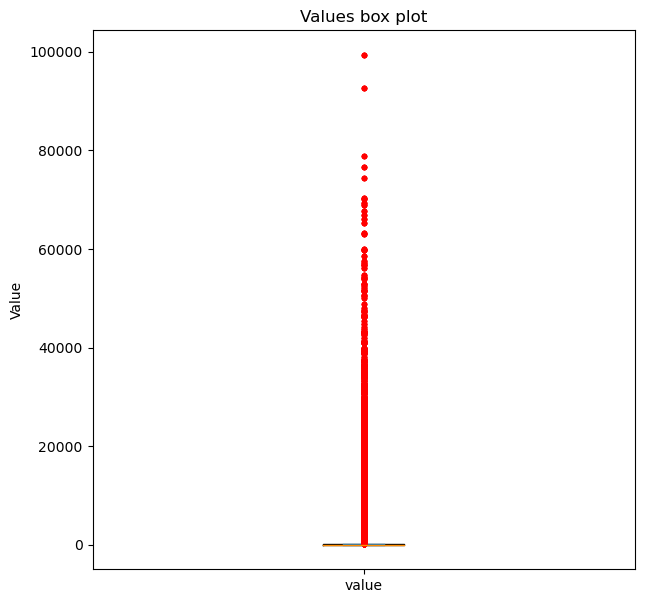

In [ ]:
fig_parameters = parameter_boxplot(data, 'value', 'Values')


In [ ]:
mean_value = data['value'].mean()
mean_value

830.3779233122816

In [ ]:
#Potential outliers
data = data.loc[data['value'] < 60]

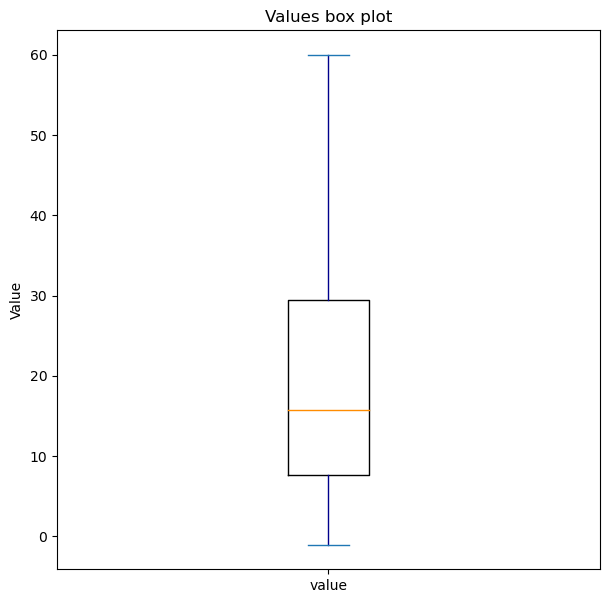

In [ ]:
fig_params = parameter_boxplot(data, 'value', 'Values')


Text(0, 0.5, '')

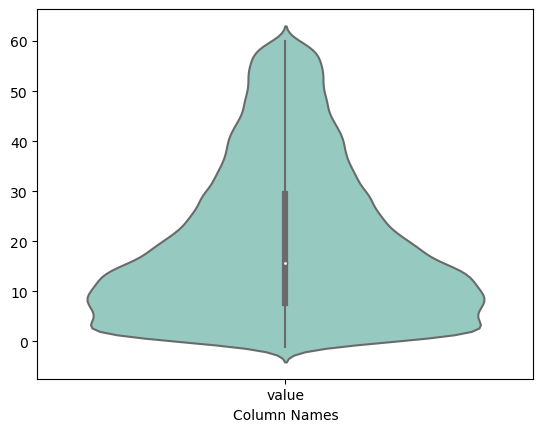

In [ ]:
sns.violinplot(data=data[['value']], palette='Set3')
plt.xlabel('Column Names')
plt.ylabel('')